## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
#Daven Prashar-Savoie
#Full time online
#Due Jan 19 2020
#Rafael Carassco 
#Blog post URL = 

In [2]:
import os 
import numpy as np
import pandas as pd
from glob import glob 

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
os.listdir() #use the os function to see all the file names 

['.git',
 '.gitignore',
 '.ipynb_checkpoints',
 '.learn',
 'awesome.gif',
 'CONTRIBUTING.md',
 'LICENSE.md',
 'module1_project_rubric.pdf',
 'movies_db.sqlite',
 'README.md',
 'student.ipynb',
 'zippedData']

In [5]:
#create a variable that lists all the files in the zipped file folder

zipped_data = os.listdir(r"C:\Users\User\flatiron\finalproject\dsc-mod-1-project-v2-1-online-ds-ft-120919\zippedData")
print(zipped_data)

['bom.movie_gross.csv', 'imdb.name.basics.csv', 'rt.movie_info.tsv', 'rt.reviews.tsv', 'title.akas.csv', 'title.basics.csv', 'title.crew.csv', 'title.principals.csv', 'title.ratings.csv', 'tmdb.movies.csv', 'tn.movie_budgets.csv']


In [6]:
#long form way of loading multiple files - DONT DO THIS
#Question: can i load these with a function?
#can i clean the titles, with a function? 

bom_movie_gross = pd.read_csv(r"C:\Users\User\flatiron\finalproject\dsc-mod-1-project-v2-1-online-ds-ft-120919\zippedData\bom.movie_gross.csv")
imdb_name_basics = pd.read_csv(r"C:\Users\User\flatiron\finalproject\dsc-mod-1-project-v2-1-online-ds-ft-120919\zippedData\imdb.name.basics.csv")  
titles_akas = pd.read_csv(r"C:\Users\User\flatiron\finalproject\dsc-mod-1-project-v2-1-online-ds-ft-120919\zippedData\title.akas.csv")
titles_basics = pd.read_csv(r"C:\Users\User\flatiron\finalproject\dsc-mod-1-project-v2-1-online-ds-ft-120919\zippedData\title.basics.csv")
title_crew = pd.read_csv(r"C:\Users\User\flatiron\finalproject\dsc-mod-1-project-v2-1-online-ds-ft-120919\zippedData\title.crew.csv")
title_principals = pd.read_csv(r"C:\Users\User\flatiron\finalproject\dsc-mod-1-project-v2-1-online-ds-ft-120919\zippedData\title.principals.csv")
title_ratings = pd.read_csv(r"C:\Users\User\flatiron\finalproject\dsc-mod-1-project-v2-1-online-ds-ft-120919\zippedData\title.ratings.csv")
tmdb_movies = pd.read_csv(r"C:\Users\User\flatiron\finalproject\dsc-mod-1-project-v2-1-online-ds-ft-120919\zippedData\tmdb.movies.csv")
tn_movies_budgets = pd.read_csv(r"C:\Users\User\flatiron\finalproject\dsc-mod-1-project-v2-1-online-ds-ft-120919\zippedData\tn.movie_budgets.csv")

In [7]:
#Short form way of loading multiple files - DO THIS

csv_files = glob(r"zippedData\*.csv")
csv_files 

['zippedData\\bom.movie_gross.csv',
 'zippedData\\imdb.name.basics.csv',
 'zippedData\\title.akas.csv',
 'zippedData\\title.basics.csv',
 'zippedData\\title.crew.csv',
 'zippedData\\title.principals.csv',
 'zippedData\\title.ratings.csv',
 'zippedData\\tmdb.movies.csv',
 'zippedData\\tn.movie_budgets.csv']

In [8]:
#Create a dictionary, populate with cleaned filenames 
#Change . to _
#
csv_files_dict = {}
for filename in csv_files:
    filename_cleaned = os.path.basename(filename).replace(".csv", "").replace(".", "_")
    filename_df = pd.read_csv(filename, index_col = 0)
    csv_files_dict[filename_cleaned] = filename_df

In [9]:
csv_files_dict.keys()

dict_keys(['bom_movie_gross', 'imdb_name_basics', 'title_akas', 'title_basics', 'title_crew', 'title_principals', 'title_ratings', 'tmdb_movies', 'tn_movie_budgets'])

In [10]:
#REALLY IMPORTANT QUESTION - 
#can i change the keY: value pairs in the csv files dictionary to a df so i can use pandas with each of the csv's individually!
#like i did below

list(csv_files_dict.values())

[                                                 studio  domestic_gross  \
 title                                                                     
 Toy Story 3                                          BV     415000000.0   
 Alice in Wonderland (2010)                           BV     334200000.0   
 Harry Potter and the Deathly Hallows Part 1          WB     296000000.0   
 Inception                                            WB     292600000.0   
 Shrek Forever After                                P/DW     238700000.0   
 ...                                                 ...             ...   
 The Quake                                         Magn.          6200.0   
 Edward II (2018 re-release)                          FM          4800.0   
 El Pacto                                           Sony          2500.0   
 The Swan                                     Synergetic          2400.0   
 An Actor Prepares                                 Grav.          1700.0   
 
          

In [11]:
#we need to convert the foreign_gross to float64, maybe we need to change title and studio to string as well
bom_movie_gross.dtypes 

title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object

In [12]:
#Code that converts comma to empty space 

bom_movie_gross['foreign_gross'] = bom_movie_gross.foreign_gross.str.replace(',', '').astype(float)

In [13]:
#original conversion failed due to a comma in one of the values, removed comma as shown above 
bom_movie_gross['foreign_gross'] = bom_movie_gross.foreign_gross.astype(float)

In [14]:
#You can see the dtypes have changed 
bom_movie_gross.dtypes

title              object
studio             object
domestic_gross    float64
foreign_gross     float64
year                int64
dtype: object

In [15]:
highest_dom_gross = bom_movie_gross['domestic_gross'].max()
print(highest_dom_gross)

936700000.0


In [16]:
bom_movie_gross['domestic_gross'].min()

100.0

In [17]:
bom_movie_gross['domestic_gross'].mean()

28745845.06698422

In [18]:
import seaborn as sns 

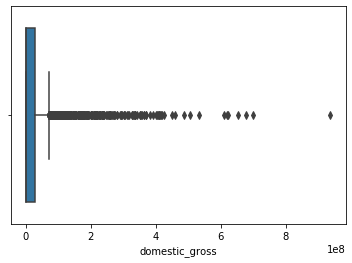

In [19]:
sns.boxplot(bom_movie_gross['domestic_gross'])

In [20]:
bom_movie_gross['domestic_gross'].dtype

dtype('float64')

In [21]:
bom_movie_gross.groupby(['domestic_gross']).max()

,title,studio,foreign_gross,year
domestic_gross,,,,
100.0,Storage 24,Magn.,NaN,2013
300.0,The Chambermaid,Magn.,NaN,2016
400.0,Apartment 143,Magn.,426000.0,2017
500.0,Max & Leon,Distrib.,NaN,2017
600.0,Death of a Superhero,Trib.,NaN,2012
...,...,...,...,...
623400000.0,Marvel's The Avengers,BV,895500000.0,2012
652300000.0,Jurassic World,Uni.,1019.4,2015
678800000.0,Avengers: Infinity War,BV,1369.5,2018


In [22]:
bom_movie_gross.min()

title              '71
domestic_gross     100
foreign_gross      600
year              2010
dtype: object

In [23]:
#create new column for total gross 

bom_movie_gross['total_gross'] = bom_movie_gross['domestic_gross'] + bom_movie_gross['foreign_gross']
bom_movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08


In [24]:
#Investigatiing columns for all existing files 
os.listdir('zippedData')

['bom.movie_gross.csv',
 'imdb.name.basics.csv',
 'rt.movie_info.tsv',
 'rt.reviews.tsv',
 'title.akas.csv',
 'title.basics.csv',
 'title.crew.csv',
 'title.principals.csv',
 'title.ratings.csv',
 'tmdb.movies.csv',
 'tn.movie_budgets.csv']

In [25]:
#Printed all the tables and headers of csv's 
#Objective is to create an sqlite3 db 
#Clear shows variables tconst, nconst
print("bom Movie gross")
bom_movie_gross.head()
print("IMBD Name Basics") 
imdb_name_basics.head()
print('Title AKAS')
titles_akas.head()
print('Title Basics')
titles_basics.head()
print('Title Crew')
title_crew.head()
print('title principals')
title_principals.head()
print('title ratings')
title_ratings.head()
print('tmdb movies')
tmdb_movies.head()
print('tn movies budget')
tn_movies_budgets.head()

bom Movie gross


,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08


IMBD Name Basics


,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


Title AKAS


,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


Title Basics


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


Title Crew


,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


title principals


,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


title ratings


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


tmdb movies


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


tn movies budget


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [26]:
#Creating sqlite database 
import sqlite3

In [27]:
#Create an sqlite3 file in your directory with no files in it 
conn = sqlite3.connect("movies_db.sqlite")

In [28]:
#Turn tmdb movies into a dataframe 

tmdb_movies.to_sql("tmdb_movies", conn)

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\generic.py:2712: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  method=method,


ValueError: Table 'tmdb_movies' already exists.

In [ ]:
#Function creates sql tables from df's using 
#try method -
#if it cant make the table, it will alert you 

def create_sql_table_from_df(df, name, conn):
    try:
        df.to_sql(name, conn)
        print(f"created table {name}")
        
    except Exception as e:
        print(f"could not make table {name}")
        print(e)

In [ ]:
for name, table in csv_files_dict.items():
    create_sql_table_from_df(table, name, conn)

In [ ]:
# Can you explain why this is necessary? 

# Now create a .gitignore file that will ignore the files that you unzipped and the sqlite file
# look at mine for a reference
# you cannot push files bigger than 100 MB to github from your computer

# you can create your file here in jupyter and open it from jupyter

#what does the w+ do? 

with open("./.gitignore", "w+") as f:
    f.write("*.sqlite") # put files you want to ignore here
    f.write("\n") # insert a new line after each file
    f.write("zippedData/")
    f.write("\n")
    f.write("zippedData/*.csv")
    f.write("\n")
    f.write("zippedData/*.gz")
 

In [ ]:
#what types of joins could be useful for future processing? 
#Shared keys include - tconst(title constant), nconst 

In [29]:
import matplotlib.pyplot as plt

In [36]:
data = bom_movie_gross['total_gross']
data2 = bom_movie_gross['title']

(array([1556.,  219.,   94.,   46.,   39.,   23.,   14.,    9.,    7.,
           2.]),
 array([4.90000000e+03, 1.51894410e+08, 3.03783920e+08, 4.55673430e+08,
        6.07562940e+08, 7.59452450e+08, 9.11341960e+08, 1.06323147e+09,
        1.21512098e+09, 1.36701049e+09, 1.51890000e+09]),
 <a list of 10 Patch objects>)

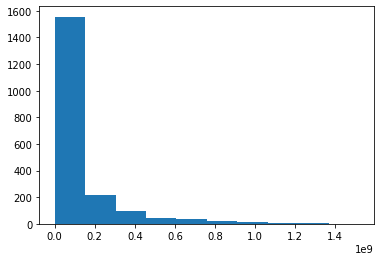

In [44]:
plt.hist(data, bins=10)
plt.show()

In [49]:
prod_budget = tn_movies_budgets['production_budget']
prod_budget.head()

0    $425,000,000
1    $410,600,000
2    $350,000,000
3    $330,600,000
4    $317,000,000
Name: production_budget, dtype: object

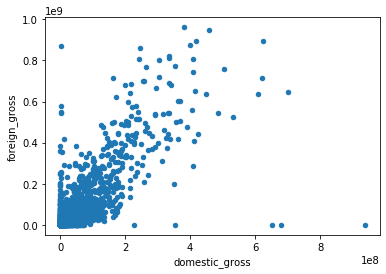

In [54]:
#Scatter plot of domestic gross and foreign gross 

bom_movie_gross.plot.scatter(x = 'domestic_gross', 
                            y = 'foreign_gross')

In [63]:
bom_movie_gross['title']

array(['Toy Story 3', 'Alice in Wonderland (2010)',
       'Harry Potter and the Deathly Hallows Part 1', ..., 'El Pacto',
       'The Swan', 'An Actor Prepares'], dtype=object)

In [64]:
#Need to remove duplicate 
bom_movie_gross['title'].value_counts()

Bluebeard                            2
Bad Samaritan                        1
Cheerful Weather for the Wedding     1
The Polar Express (2014 re-issue)    1
Taken 3                              1
                                    ..
22 Bullets                           1
Housefull                            1
Snow Flower and the Secret Fan       1
The Other Side of Hope               1
Tamara Drewe                         1
Name: title, Length: 3386, dtype: int64